<a href="https://colab.research.google.com/github/Shirisha111/ML/blob/master/Breast_Cancer_Wisconsin_diagnostic_EDA_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
#columns = ["ID","diagnosis","radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmtery","fractal dimension",""]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",sep=",",header=None)
df.columns = ["ID","Diagnosis","radius","texture","perimeter","area","smoothness","compactness","concavity","concave_points","symmtery","fractal_dimension",
              "radius_se", "texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave_point_se","symmetry_se","fractal_dimension_se",
              "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave_point_worst","symmetry_worst","fractal_dimension_worst"]
df.head()


,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmtery,fractal_dimension,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_point_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
#Separating dependent and independent variables
drop_cols = ["Diagnosis","ID"]
X = df.drop(drop_cols, axis=1)
y = df["Diagnosis"]
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmtery,fractal_dimension,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_point_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: Diagnosis, dtype: object

Number of Benign Tumors : 357
Number of Malignant Tumors : 212


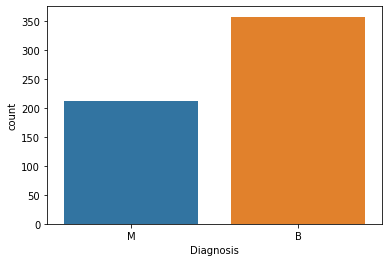

In [39]:
# To know if the dataset is imbalance or not using visualizations
ax = sns.countplot(y,label = "count")   # countplot counts the no.of values of different classes in a column
B, M = y.value_counts()
print("Number of Benign Tumors :", B)
print("Number of Malignant Tumors :", M)

The above histogram clearly shows that the data is imabalanced as the number of Benign cases are higher when compared to Malignant. So, it shows that we have to handle the imbalanced data before modelling

In [40]:
X.describe()   # descriptive statistics

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmtery,fractal_dimension,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_point_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The above tables describes the mean, standard deviation, min value, maximum value etc. For example, the range of max value of area and smoothness differs alot, that shows that we have to use some normalisation or standartization techniques before we move on to feature selection and classification.

Violin plot is a method of plotting numeric data.   
Violin plots are similar to box plots except that they show the density of the data at different values.    
Before creating Violin plots and swarm plots we need standardize the data.

In [41]:
data = X
data_standard = (data - data.mean())/data.std()    # standardizing the data

Before Creating Violin plots, we saw that we have 30 columns, 
so it would be heavy to plot it out at once, so we shall divide it in to 3 groups where each group has 10 features. This way we would be able to observe the data better.

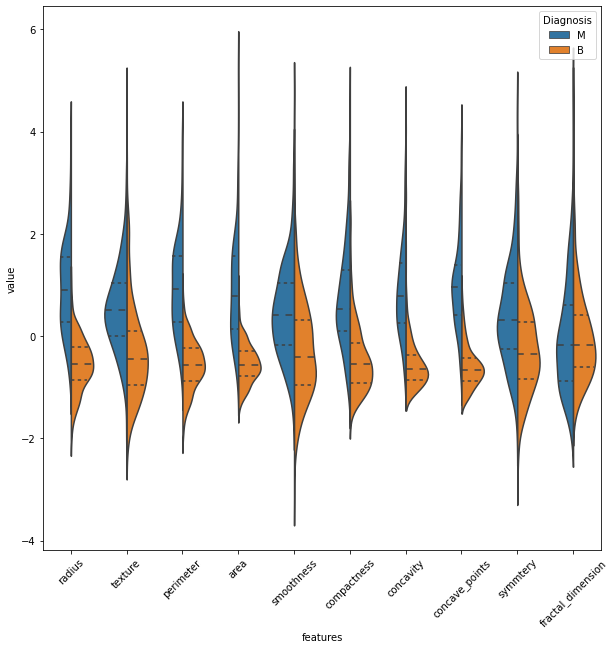

In [45]:
data = pd.concat([y, data_standard.iloc[:, 0:10]], axis=1) # Creating a new dataframe with only 10 features
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name= "value") # Making the data from in to right format and structure for plotting
plt.figure(figsize=(10,10))  # Using matplotlib to set the figure size
sns.violinplot(x ="features", y ="value", hue="Diagnosis",data= data, split= True, inner= "quart")
plt.xticks(rotation=45);

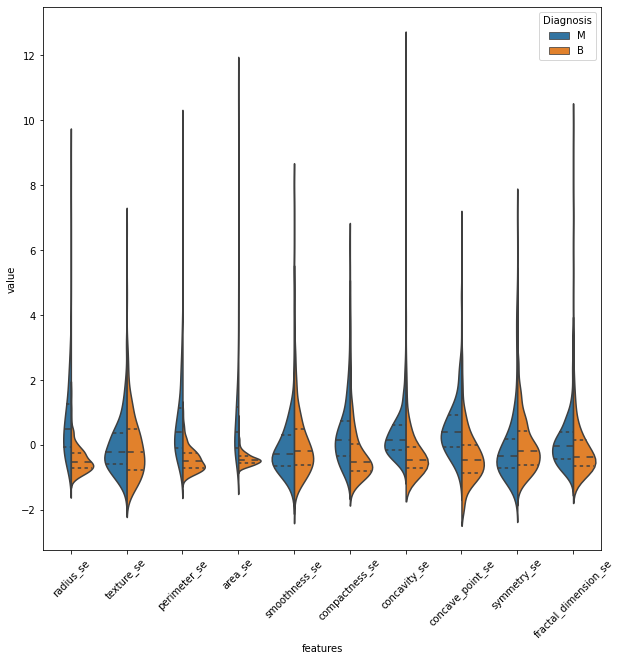

In [46]:
data = pd.concat([y, data_standard.iloc[:, 10:20]], axis=1) # Creating a new dataframe with only 10 features
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name= "value") # Making the data from in to right format and structure for plotting
plt.figure(figsize=(10,10))  # Using matplotlib to set the figure size
sns.violinplot(x ="features", y ="value", hue="Diagnosis",data= data, split= True, inner= "quart")
plt.xticks(rotation=45);

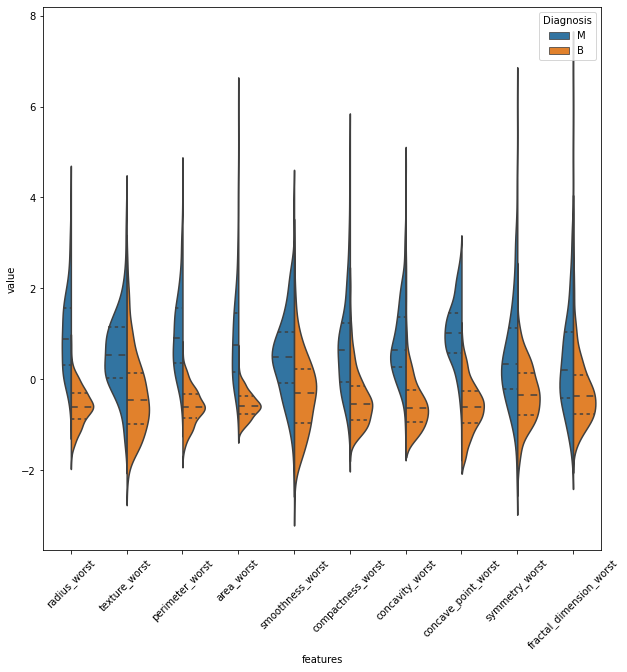

In [47]:
data = pd.concat([y, data_standard.iloc[:, 20:30]], axis=1) # Creating a new dataframe with only 10 features
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name= "value") # Making the data from in to right format and structure for plotting
plt.figure(figsize=(10,10))  # Using matplotlib to set the figure size
sns.violinplot(x ="features", y ="value", hue="Diagnosis",data= data, split= True, inner= "quart")
plt.xticks(rotation=45);

For example, in the above plot, it looks like the concavity_worst and concave_point_worst are similar. For now, we are not sure if they are corelated or not. The best practice is, if they are corelated, it a best way to reduce the redundacy by dropping one of those features.

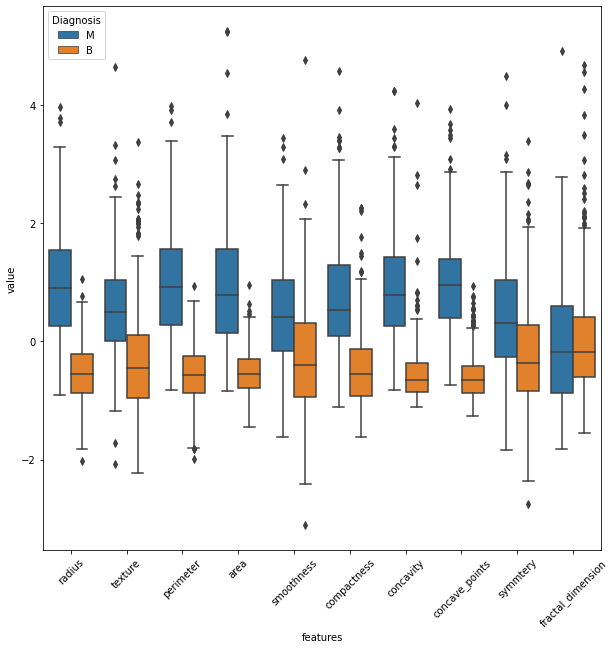

In [55]:
# Box plots helps in identifying the outliers.
data = pd.concat([y, data_standard.iloc[:, 0:10]], axis=1) # Creating a new dataframe with only 10 features
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name= "value")
plt.figure(figsize=(10,10))
sns.boxplot(x ="features", y="value", hue="Diagnosis",data=data)
plt.xticks(rotation=45);

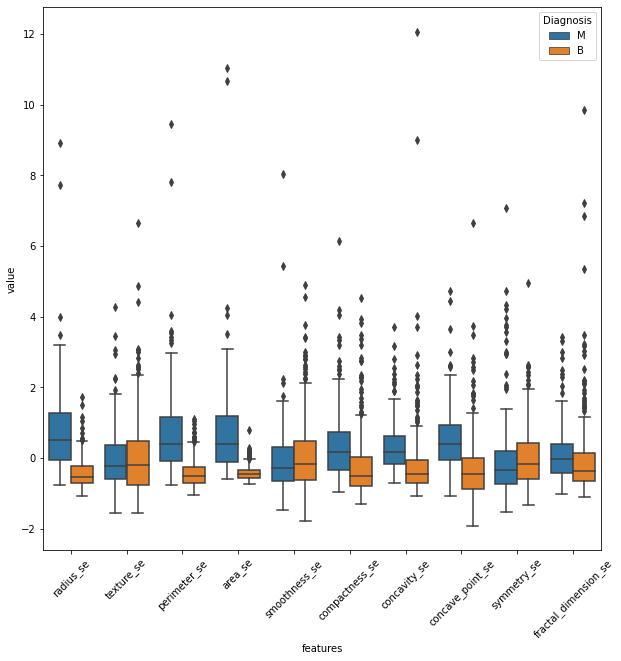

In [56]:
data = pd.concat([y, data_standard.iloc[:, 10:20]], axis=1) # Creating a new dataframe with only 10 features
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name= "value")
plt.figure(figsize=(10,10))
sns.boxplot(x ="features", y="value", hue="Diagnosis",data=data)
plt.xticks(rotation=45);

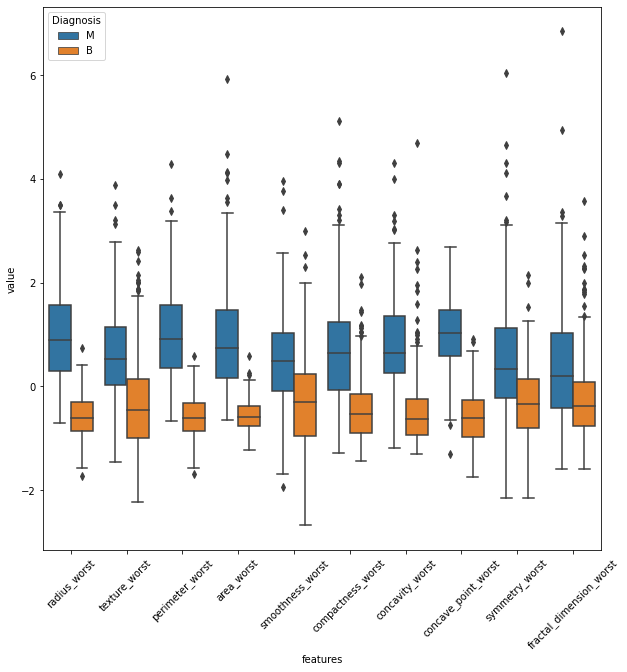

In [57]:
data = pd.concat([y, data_standard.iloc[:, 20:30]], axis=1) # Creating a new dataframe with only 10 features
data = pd.melt(data, id_vars = "Diagnosis", var_name = "features", value_name= "value")
plt.figure(figsize=(10,10))
sns.boxplot(x ="features", y="value", hue="Diagnosis",data=data)
plt.xticks(rotation=45);

In the violin plot we found that the 2 features looks similar to each other. The issue here is that the 2 corelated columns can negatively impact the predictive accuracy of your classifier. So we would drop one of the corelated columns.


Joint Plots help us in the same. It is very much helpful to dig deeper in to 2 specific features.

<Figure size 1440x720 with 0 Axes>

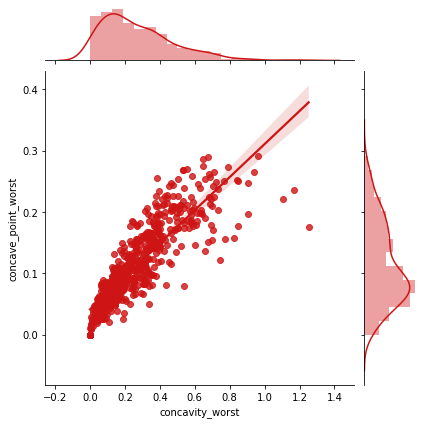

In [65]:
sns.jointplot(X.loc[:, "concavity_worst"], 
              X.loc[:, "concave_point_worst"], 
              kind="regg",
              color= "#ce1414"
              );


So, by looking at the above graph, we can straightly confirm that those 2 features are highly corelated.

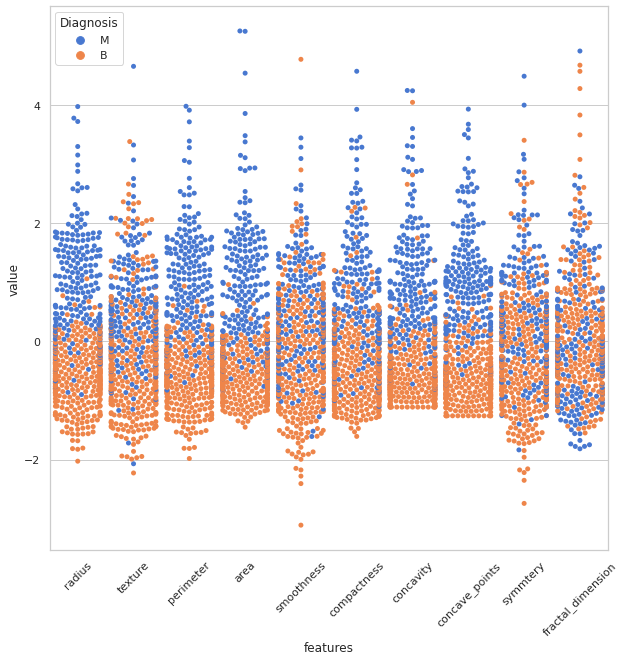

In [68]:
# Swarm plot will show us all the data points while stacking up with the similar values
# It helps in observing the distribution of the values 
sns.set(style="whitegrid", palette="muted")
data = X
data_standard = (data - data.mean())/data.std()
data = pd.concat([y, data_standard.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="Diagnosis",
               var_name="features",
               value_name="value")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=45);

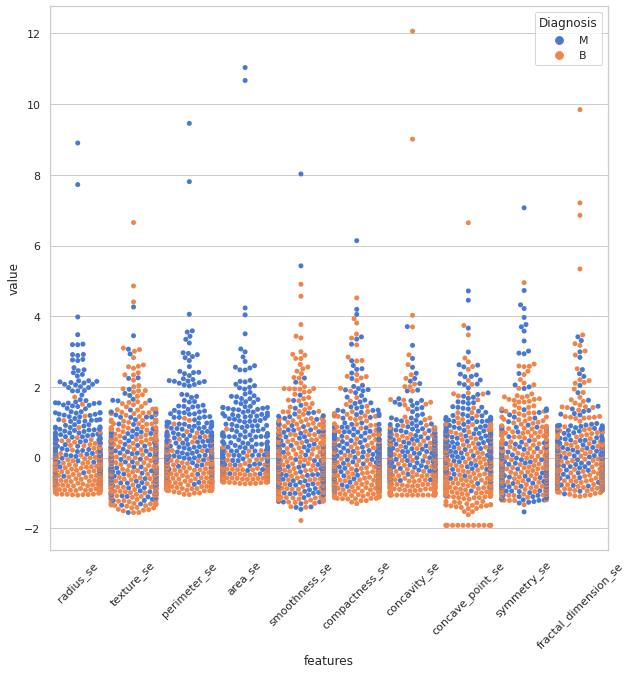

In [69]:
sns.set(style="whitegrid", palette="muted")
data = X
data_standard = (data - data.mean())/data.std()
data = pd.concat([y, data_standard.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="Diagnosis",
               var_name="features",
               value_name="value")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=45);

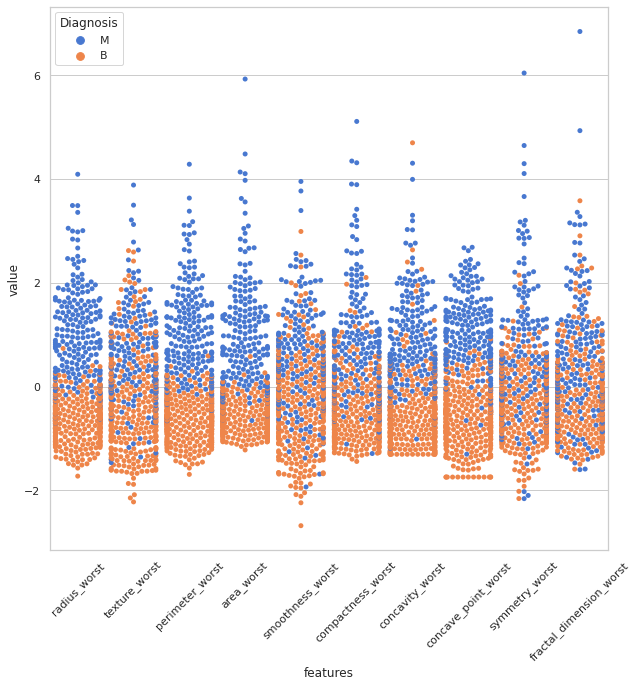

In [70]:
sns.set(style="whitegrid", palette="muted")
data = X
data_standard = (data - data.mean())/data.std()
data = pd.concat([y, data_standard.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars="Diagnosis",
               var_name="features",
               value_name="value")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Diagnosis", data=data)
plt.xticks(rotation=45);

So, we can tell which feature is better for classification by looking at the variance and how well separated they are. For example from the second plot we can say that the perimeter_worst feature is much more than the smoothness_worst feature



So till now we have done all the plots using batchwise to find out the corelation. Now lets look at how we can get the corelation  matrix for all the features using heatmaps.

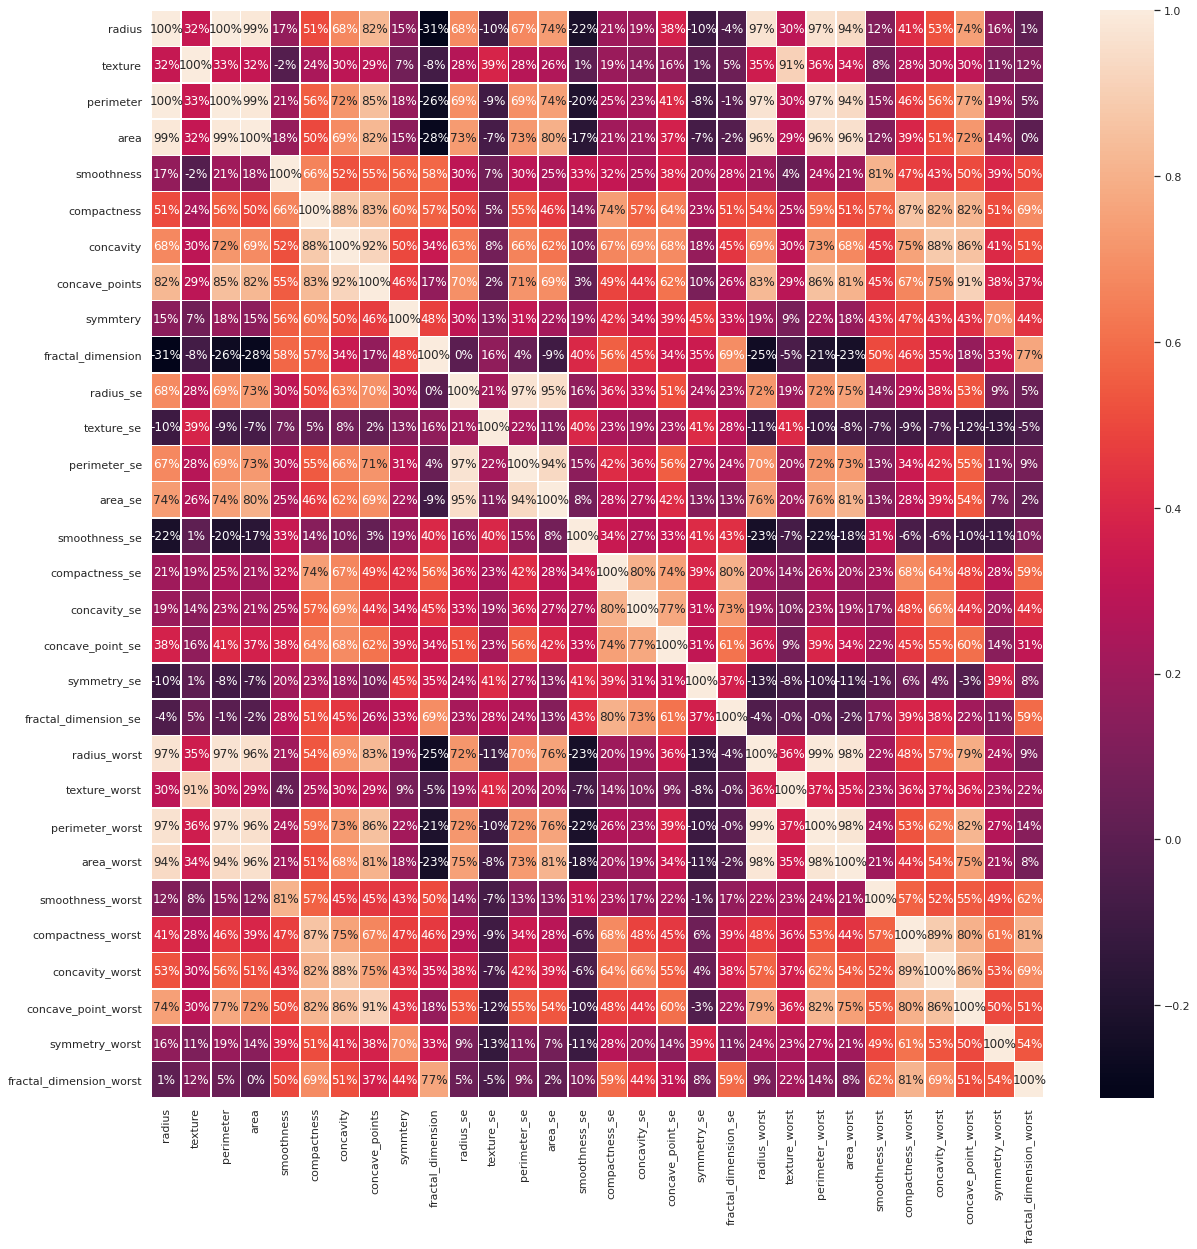

In [78]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, linewidth= .5, fmt ='.0%', ax=ax);


The above heatmap shows the corelation between all the features which would be very helpful in selecting the important features.For example, the black colour here shows that they are very negatively corelated and white colour cells have a very high corelation.